# Notebook to combine TensorMap phases 
__Written by Haixing Fang, Jon Wright and James Ball__  
__Date: 21/02/2025__

In [1]:
exec(open('/data/id11/nanoscope/install_ImageD11_from_git.py').read())

In [2]:
# this cell is tagged with 'parameters'
# to view the tag, select the cell, then find the settings gear icon (right or left sidebar) and look for Cell Tags

# python environment stuff
PYTHONPATH = setup_ImageD11_from_git( ) # ( os.path.join( os.environ['HOME'],'Code'), 'ImageD11_git' )

# dataset file to import
dset_path = 'si_cube_test/processed/Si_cube/Si_cube_S3DXRD_nt_moves_dty/Si_cube_S3DXRD_nt_moves_dty_dataset.h5'

phase_strs = ['Fe', 'Au']

# whether or not we are combining refined tensormaps (changes where we look for them)
combine_refined = True

# Setting path via: 
sys.path.insert(0, /home/esrf/james1997a/Code/ImageD11 )


# Running from: /home/esrf/james1997a/Code/ImageD11/ImageD11/__init__.py


In [3]:
# Parameters
phase_strs = ["Fe", "Au"]
combine_refined = True
PYTHONPATH = "../"
dset_path = "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/PROCESSED_DATA/20250221_JADB/tomo_route/FeAu_0p5_tR_nscope/FeAu_0p5_tR_nscope_top_200um/FeAu_0p5_tR_nscope_top_200um_dataset.h5"


In [4]:
import os

import ImageD11.sinograms.dataset
from ImageD11.sinograms.tensor_map import TensorMap

%matplotlib ipympl

# Load data
## Dataset

In [5]:
ds = ImageD11.sinograms.dataset.load(dset_path)
print(ds)

dataroot = "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/RAW_DATA"
analysisroot = "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/PROCESSED_DATA/20250221_JADB/tomo_route"
sample = "FeAu_0p5_tR_nscope"
dset = "top_200um"
shape = ( 275, 1448)
# scans 275 from 1.1 to 275.1


## Phases
If the parameter file was a json, we can access the unit cells via `ds.phases.unitcells`

In [6]:
ds.phases = ds.get_phases_from_disk()
ds.phases.unitcells

{'Au': Au | [ 4.005  4.005  4.005 90.    90.    90.   ] | 225,
 'Fe': Fe | [ 2.8694  2.8694  2.8694 90.     90.     90.    ] | 229,
 'CeO2': CeO2 | [ 5.41143  5.41143  5.41143 90.      90.      90.     ] | F}

In [7]:
# what phases are we merging?
print(*[ds.phases.unitcells[phase_str].lattice_parameters for phase_str in phase_strs], sep='\n')

[ 2.8694  2.8694  2.8694 90.     90.     90.    ]
[ 4.005  4.005  4.005 90.    90.    90.   ]


Choose where to import your TensorMaps from.  
If you refined them, you'll need to change the below paths to point to the separate refined tensormap h5 files.

In [8]:
if combine_refined:
    tensor_maps = [TensorMap.from_h5(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_refined_tmap_{phase_str}.h5')) for phase_str in phase_strs]
else:
    tensor_maps = [TensorMap.from_h5(ds.grainsfile, h5group='TensorMap_' + phase_str) for phase_str in phase_strs]

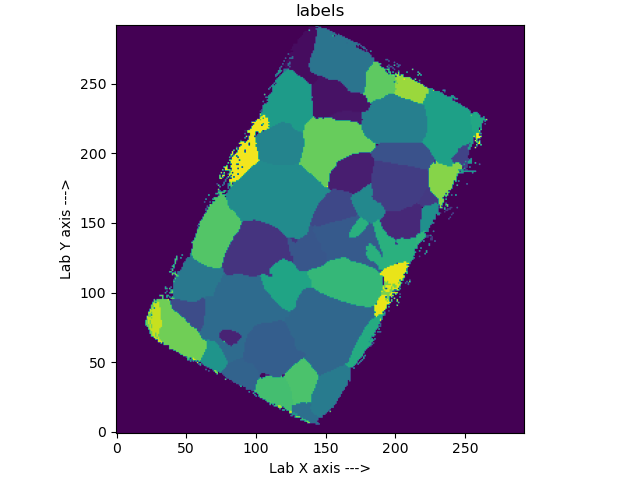

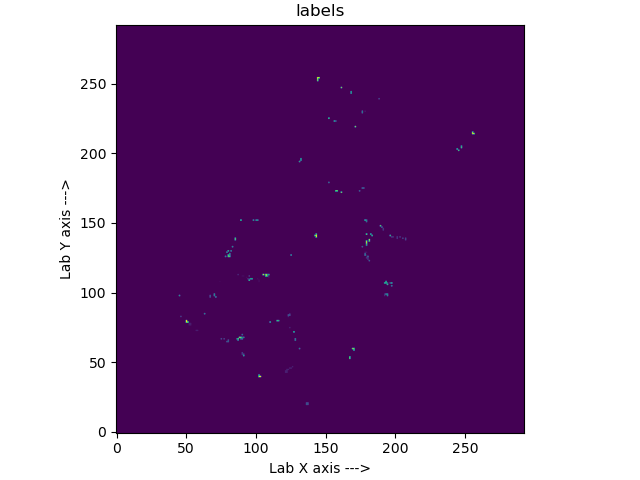

In [9]:
try:
    for tmap in tensor_maps:
        tmap.plot('labels')
except KeyError:
    # no labels field
    pass

In [10]:
tensor_map_combined = TensorMap.from_combine_phases(tensor_maps)

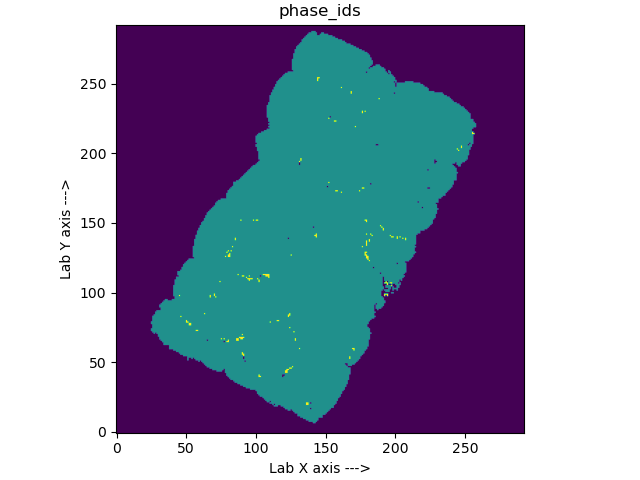

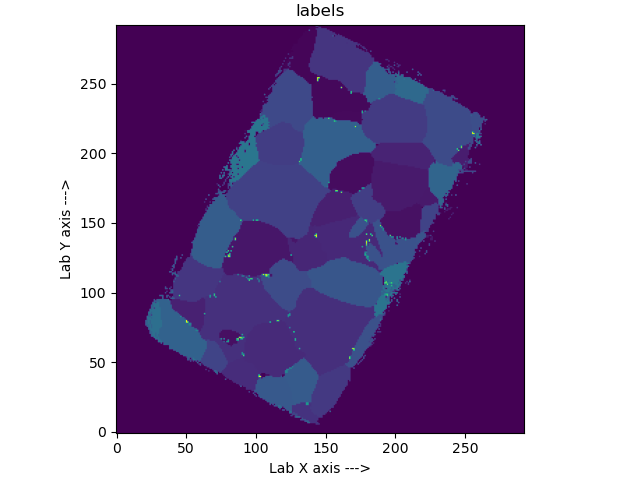

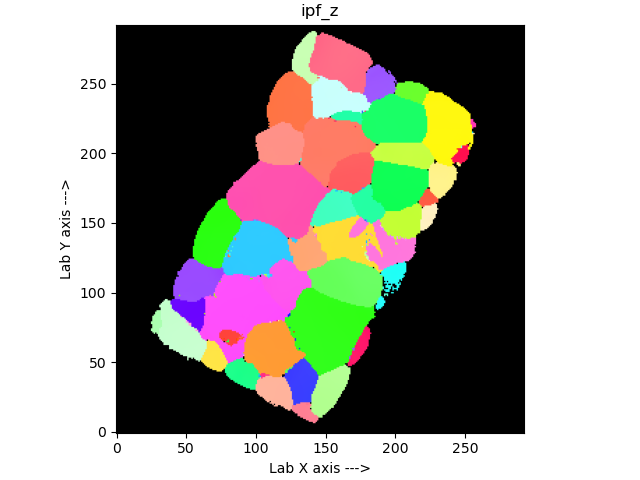

In [11]:
tensor_map_combined.plot('phase_ids')
try:
    tensor_map_combined.plot('labels')
except KeyError:
    # no labels field
    pass
tensor_map_combined.plot('ipf_z')

# Export

In [12]:
if combine_refined:
    tensor_map_combined.to_h5(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_refined_tmap_combined.h5'))
    tensor_map_combined.to_paraview(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_refined_tmap_combined.h5'))
else:
    tensor_map_combined.to_h5(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_tmap_combined.h5'))
    tensor_map_combined.to_paraview(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_tmap_combined.h5'))